<a href="https://colab.research.google.com/github/11carol/class_area/blob/develop/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testando imagens


In [2]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.6 MB/s 


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from pathlib import Path

In [4]:
def load_landsat_image(img_folder, bands):
    image = {}
    path = Path(img_folder)
    for band in bands:
        # considering the landsat images end with *_SR_B#.TIF, we will use it to locate the correct file
        file = next(path.glob(f'*_T1_{band}.TIF'))
        print(f'Opening file {file}')
        ds = rasterio.open(file)
        image.update({band: ds.read(1)})

    return image

In [13]:
# load the image
img = load_landsat_image('/content/imagens', ['B3', 'B4', 'B5'])
img.keys()

Opening file /content/imagens/LT05_L1TP_228062_20091023_20200825_02_T1_B3.TIF
Opening file /content/imagens/LT05_L1TP_228062_20091023_20200825_02_T1_B4.TIF
Opening file /content/imagens/LT05_L1TP_228062_20091023_20200825_02_T1_B5.TIF


dict_keys(['B3', 'B4', 'B5'])

In [14]:
img['B3'].shape, img['B4'].shape, img['B5'].shape

((6941, 7901), (6941, 7901), (6941, 7901))

In [15]:
type(img), type(img['B3'])

(dict, numpy.ndarray)

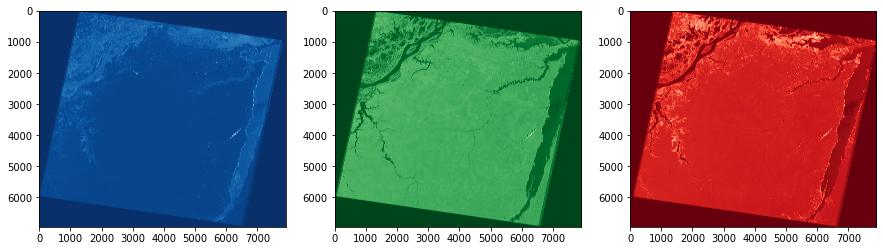

In [16]:
# checking the images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img['B3'], cmap='Blues_r')
ax[1].imshow(img['B4'], cmap='Greens_r')
ax[2].imshow(img['B5'], cmap='Reds_r')

In [17]:
def display_rgb(img, b_r, b_g, b_b, alpha=1., figsize=(10, 10)):
    rgb = np.stack([img[b_r], img[b_g], img[b_b]], axis=-1)
    rgb = rgb/rgb.max() * alpha
    plt.figure(figsize=figsize)
    plt.imshow(rgb)

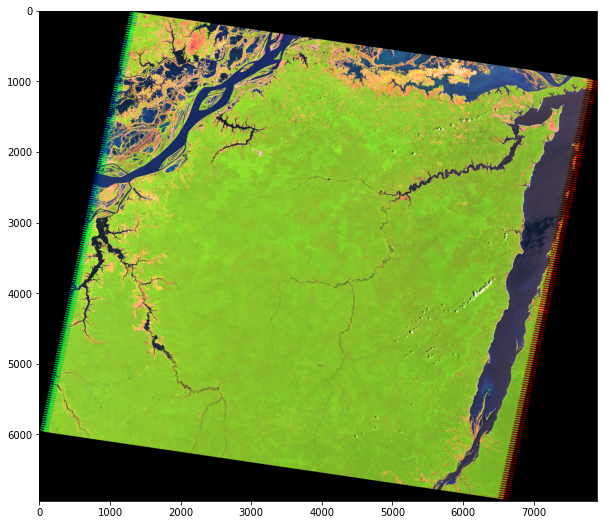

In [18]:
# natural color
display_rgb(img, 'B5', 'B4', 'B3', alpha=2.)

Opening file /content/imagens/LT05_L1TP_228062_20091023_20200825_02_T1_B3.TIF
Opening file /content/imagens/LT05_L1TP_228062_20091023_20200825_02_T1_B4.TIF
Opening file /content/imagens/LT05_L1TP_228062_20091023_20200825_02_T1_B5.TIF
Opening file /content/imagens/LT05_L1TP_228062_20091023_20200825_02_T1_B7.TIF


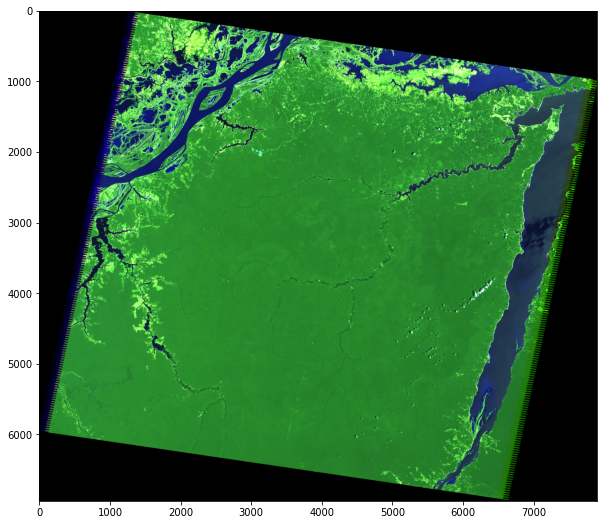

In [23]:
# false color using shortwave infrared B7, near infrared B5 and green.
img = load_landsat_image('/content/imagens', ['B3', 'B4', 'B5', 'B7'])
display_rgb(img, 'B7', 'B5', 'B3', alpha=2.)

In [21]:
def normalized_difference(img, b1, b2, eps=0.0001):
    band1 = np.where((img[b1]==0) & (img[b2]==0), np.nan, img[b1])
    band2 = np.where((img[b1]==0) & (img[b2]==0), np.nan, img[b2])
    
    return (band1 - band2) / (band1 + band2)

In [24]:
ndvi = normalized_difference(img, 'B5', 'B4')
mndwi = normalized_difference(img, 'B3', 'B5')

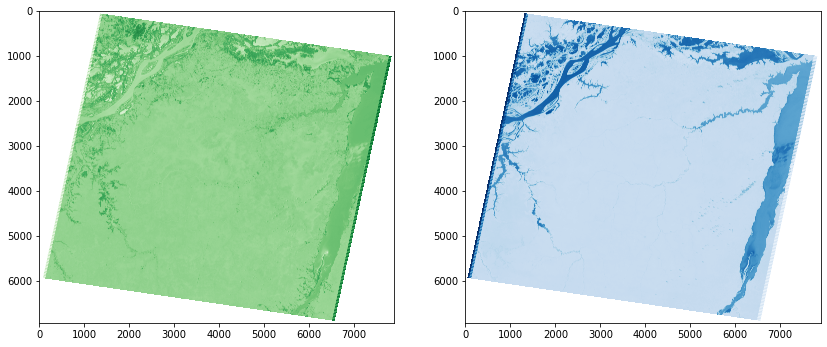

In [25]:
# checking the images
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].imshow(ndvi, cmap='Greens')
ax[1].imshow(mndwi, cmap='Blues')

In [26]:
water_mask = mndwi > -0.0

water_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

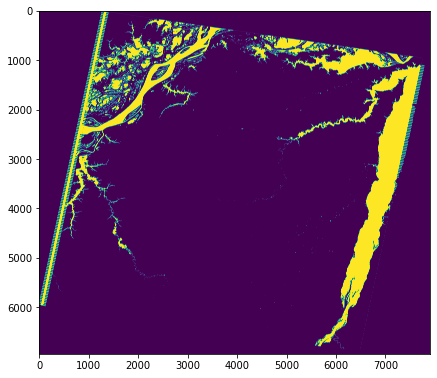

In [27]:
plt.figure(figsize=(7,7))
plt.imshow(water_mask)